In [1]:

import anytree.search
import matplotlib.pyplot as plt
import pandas as pd
from anytree.importer import JsonImporter
from anytree.iterators.preorderiter import PreOrderIter
import os
import json
import datetime
import numpy as np

C:\Users\mikad\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\mikad\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Users\mikad\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
# survey.csv
# depth.csv
# breadth.csv

In [3]:
right_wing_seeds = []
left_wing_seeds = []

channels_df = pd.read_csv('C:\\Users\\mikad\\PycharmProjects\\Comp_396_YouTube_Radicalization\\channel_review.csv')

with open('C:\\Users\\mikad\\PycharmProjects\\Comp_396_YouTube_Radicalization\\seeds\\seeds_right') as outfile:
    lines = outfile.read().splitlines()
    for i in lines:
        right_wing_seeds.append(i)

with open('C:\\Users\\mikad\\PycharmProjects\\Comp_396_YouTube_Radicalization\\seeds\\seeds_left') as outfile:
    lines = outfile.read().splitlines()
    for i in lines:
        left_wing_seeds.append(i)

In [4]:
#get dictionary of dictionairies
path_videos = 'D:\\Data Science\\YouTube Content Silos\\Videos'
video_info = {}
json_files = os.listdir(path_videos)

for file in json_files:
    with open(path_videos+ '/' +file, 'r') as outfile:
        data = json.load(outfile)
        video_info.update(data)

print(len(video_info.keys()))

17126


In [5]:
tags_right = ['AntiSJW', 'Conspiracy', 'PartisanRight', 'ReligiousConservative', 'WhiteIdentitarian', 'Libertarian', 'MRA']
tags_left = ['SocialJustice', 'Socialist', 'PartisanLeft', 'AntiWhiteness', 'LGBT']

tags_right_bis = ['AntiSJW', 'Conspiracy', 'PartisanRight', 'ReligiousConservative', 'WhiteIdentitarian', 'Libertarian', 'MRA', 'Provocateur', 'Mainstream News', 'LateNightTalkShow']
tags_left_bis = ['SocialJustice', 'Socialist', 'PartisanLeft', 'AntiWhiteness', 'LGBT', 'Mainstream News', 'LateNightTalkShow']

all_tags  = tags_right + tags_left

In [6]:
# paths to everything
path_survey_trees = "D:\\Data Science\\YouTube Content Silos\\Survey\\tree"
path_survey_homepage = "D:\\Data Science\\YouTube Content Silos\\Survey\\homepage"

survey_trees = os.listdir(path_survey_trees)
survey_homepages = os.listdir(path_survey_homepage)

path_depth_trees = "D:\\Data Science\\YouTube Content Silos\\Depth\\tree"
path_depth_homepage = "D:\\Data Science\\YouTube Content Silos\\Depth\\homepage"

depth_trees = os.listdir(path_depth_trees)
depth_homepages = os.listdir(path_depth_homepage)

path_breadth_trees = "D:\\Data Science\\YouTube Content Silos\\Breadth\\Scraping-21-02-22\\tree"
path_breadth_homepage = "D:\\Data Science\\YouTube Content Silos\\Breadth\\Scraping-21-02-22\\homepage"

breadth_trees = os.listdir(path_breadth_trees)
breadth_homepages = os.listdir(path_breadth_homepage)

In [7]:
# urls that are not in the dictionairy that we would like to visit
urls_to_visit = []

# 1. Get all the required video urls

To-do
* replace the breadth homepage urls
* homepage video urls
* recommended video urls
* tree node urls

In [8]:
importer = JsonImporter()

def text_to_date(date: str):
    date = date.replace(',', '')
    split_date = date.split(' ')
    return datetime.date(year=split_date[2], month=split_date[0], day=split_date[1])

def homepage_file_to_url(path_file:str):
    homepages = []
    with open(path_file, 'r') as outfile:
        lines = outfile.read().splitlines()
        lines = [i for i in lines if not(i == None)]
        lines = lines[0 : min(10, len(lines))]

        for i in lines:
            if not (i in video_info.keys()):
                homepages.append(i)
        outfile.close()
    return homepages

def tree_file_to_url_list(file_path: str):
    urls = []
    with open(file_path, 'r') as outfile:
        data = outfile.read()
        root = importer.import_(data)
        for t in anytree.LevelOrderIter(root):
            if not(t.id == 'dummy'):
                recommended_videos = t.top_10_recommended
                recommended_videos = [i for i in recommended_videos if not(i == None)]
                recommended_videos = recommended_videos[0:min(5, len(recommended_videos))]

                video_url = t.id
                urls.append(video_url)
                for reco_urls in recommended_videos:
                    urls.append(reco_urls)
    return urls

In [9]:
count = 0
for d_trees in depth_trees:
    urls = tree_file_to_url_list(path_depth_trees + '\\' + d_trees)
    for i in urls:
        count += 1
        if not(i in video_info.keys()):
            urls_to_visit.append(i)

for s_trees in survey_trees:
    urls = tree_file_to_url_list(path_survey_trees + '\\' + s_trees)
    for i in urls:
        count += 1
        if not(i in video_info.keys()):
            urls_to_visit.append(i)

In [10]:
# cycle through the homepages and get the urls
all_homepages = [survey_homepages, depth_homepages, breadth_homepages]
all_paths = [path_survey_homepage, path_depth_homepage, path_breadth_homepage]

for homepage_file, path in zip(all_homepages, all_paths):
    for file in homepage_file:
        file_path = path + '\\' + file
        with open(file_path, 'r') as outfile:
            urls = homepage_file_to_url(file_path)
            for i in urls:
                if not(i in video_info.keys()):
                    urls_to_visit.append(i)

In [11]:
urls_to_visit = list(set(urls_to_visit))
print(len(set(urls_to_visit)))

0


In [12]:
text_file_video_urls = open(f'{os.getcwd()}\\Videos to visit\\video urls.txt', 'w+')
for urls in urls_to_visit:
    text_file_video_urls.write(urls + '\n')
text_file_video_urls.close()

# 2. Perform data analysis

## a. Helper Scripts

In [13]:
#scripts common to all

"""
input : string
    - name of the YouTube video content creator
output : int
    - 1 -> content creator is right wing
    - (-1) -> content creator is left wing
    - 0 -> content creator is neither
"""
def content_creator_to_bias(content_creator):
    try:
        if (channels_df['CHANNEL_TITLE'].str.contains('^'+ content_creator +'$').sum() > 0):
            # now check what the type of the channels found were
            c = channels_df.loc[channels_df['CHANNEL_TITLE'].str.contains('^'+ content_creator +'$', case=False, na=False)]
            for tags in all_tags:
                if (c['REVIEWER_TAGS'].str.contains(tags).sum() > 0) or (c['TAGS'].str.contains(tags).sum() > 0):
                    temp = [np.array(i.split('|')) for i in np.concatenate((c['REVIEWER_TAGS'].unique(), c['TAGS'].unique())) if isinstance(i, str) ]
                    t = []
                    for x in temp:
                        for j in x:
                            t.append(j)
                    t = np.unique(t)
                    if tags in tags_left:
                        return 'left rec', t
                    elif tags in tags_right:
                        return 'right rec', t
        return 'other rec', []
    except Exception as e:
        print(content_creator)
        raise ValueError(f'Error raise: \n{e}')

"""
Description: given a url, it will return the content creator of the video
input : string
    - url of the video whose creator we want
output : String || None
    - content creator : string
    -  None if
        * url is None
        * url is empty
        * url is not known and needs to be scraped
"""
def url_to_content_creator(url:str):
    if url == None:
        return None

    url = url.strip('\n')

    if url in video_info.keys():
        return video_info[url]['content creator']
    elif url == '':
        return None
    else:
        urls_to_visit.append(url)
        return None

## b. Depth
### i. Recommended videos

In [14]:
importer = JsonImporter()

depth_left_ids = []
depth_right_ids = []

depth_right_trees = []
depth_left_trees = []

# figure out which files have right wing seed, which have left wing seed
for trees in depth_trees:
    id = (trees.split('_')[3]).replace('.txt', '')
    with open(path_depth_trees + '\\' + trees, 'r') as outfile:
        data = outfile.read()
        root = importer.import_(data)
        if root.id in right_wing_seeds:
            depth_right_ids.append(id)
        else:
            depth_left_ids.append(id)

In [15]:
depth_data = {
    'id': [],
    'content creator': [],
    'position': [],
    'ply': [],
    'tree bias': [],
    'left rec': [],
    'right rec': [],
    'other rec': [],
    'total': [],
    'AntiSJW': [],
    'Conspiracy': [],
    'PartisanRight': [],
    'ReligiousConservative': [],
    'WhiteIdentitarian': [],
    'Libertarian': [],
    'MRA': [],
    'Provocateur': [],
    'Mainstream News': [],
    'LateNightTalkShow': [],
    'SocialJustice' : [],
    'Socialist' : [],
    'PartisanLeft': [],
    'AntiWhiteness': [],
    'LGBT': [],
    'Mainstream News': [],
    'video creator classification': [],
    'video bias': [],
    'recommendation list': []
}

#create the csv for the trees
tree_number = 0
for tree in depth_trees:
    tree_number += 1
    print(f'{tree_number}/{len(depth_trees)}', end='')
    id = (tree.split('_')[3]).replace('.txt', '')
    tree_bias = None
    if id in depth_left_ids:
        tree_bias = 'Left'
    elif id in depth_right_ids:
        tree_bias = 'Right'
    else:
        print(f'Problem')

    #'id', 'tree bias', 'left rec', 'right rec', 'other', 'total', 'video bias'
    with open(path_depth_trees + '\\' + tree, 'r') as outfile:
        data = outfile.read()
        root = importer.import_(data)
        position = 0
        corrupted = False

        for t in anytree.PreOrderIter(root):

            depth_data['id'].append(id)
            depth_data['tree bias'].append(tree_bias)
            depth_data['position'].append(position)
            count = {
                'left rec': 0,
                'right rec': 0,
                'other rec' : 0,
                'AntiSJW': 0,
                'Conspiracy': 0,
                'PartisanRight': 0,
                'ReligiousConservative': 0,
                'WhiteIdentitarian': 0,
                'Libertarian': 0,
                'MRA': 0,
                'Provocateur': 0,
                'Mainstream News': 0,
                'LateNightTalkShow': 0,
                'SocialJustice' : 0,
                'Socialist' : 0,
                'PartisanLeft': 0,
                'AntiWhiteness': 0,
                'LGBT': 0,
                'Mainstream News': 0
            }
            # check that you only want top 5
            recommended_videos = t.top_10_recommended
            recommended_videos = [i for i in recommended_videos if not(i == None)]
            recommended_videos = recommended_videos[0:min(5, len(recommended_videos))]
            total_rec = 0
            rec_total = []
            for rec in recommended_videos:
                if rec != None:
                    content_creator = url_to_content_creator(rec)
                    if content_creator != None:
                        total_rec += 1
                        bias, taggies = content_creator_to_bias(content_creator)
                        count[bias] += 1
                        rec_total.append(rec)
                        for i in taggies:
                            if i in count.keys():
                                count[i] += 1
                    else:
                        count['other rec'] += 1
                else:
                    corrupted = True
            for k, v in count.items():
                depth_data[k].append(v)

            depth_data['total'].append(total_rec)
            video_bias = content_creator_to_bias(t.video['content creator'])
            depth_data['video bias'].append(video_bias)
            depth_data['content creator'].append(t.video['content creator'])
            depth_data['video creator classification'].append(content_creator_to_bias(t.video['content creator'])[0])
            depth_data['recommendation list'].append(rec_total)
            if position == 0:
                ply = 0
            else:
                pos_temp = position - 1
                pos_temp = np.mod(pos_temp, 6)
                ply = pos_temp + 1
            depth_data['ply'].append(ply)
            position += 1
        print(corrupted)
print(len(urls_to_visit))

1/79False
2/79False
3/79False
4/79False
5/79False
6/79

C:\Users\mikad\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


False
7/79False
8/79False
9/79False
10/79False
11/79False
12/79False
13/79False
14/79False
15/79False
16/79False
17/79False
18/79False
19/79False
20/79False
21/79False
22/79False
23/79False
24/79False
25/79False
26/79False
27/79False
28/79False
29/79False
30/79False
31/79False
32/79False
33/79False
34/79False
35/79False
36/79False
37/79False
38/79False
39/79False
40/79False
41/79False
42/79False
43/79False
44/79False
45/79False
46/79False
47/79False
48/79False
49/79False
50/79False
51/79False
52/79False
53/79False
54/79False
55/79False
56/79False
57/79False
58/79False
59/79False
60/79False
61/79False
62/79False
63/79False
64/79False
65/79False
66/79False
67/79False
68/79False
69/79False
70/79False
71/79False
72/79False
73/79False
74/79False
75/79False
76/79False
77/79False
78/79False
79/79False
0


In [16]:
for k, v in depth_data.items():
    print(k, len(v))

id 2449
content creator 2449
position 2449
ply 2449
tree bias 2449
left rec 2449
right rec 2449
other rec 2449
total 2449
AntiSJW 2449
Conspiracy 2449
PartisanRight 2449
ReligiousConservative 2449
WhiteIdentitarian 2449
Libertarian 2449
MRA 2449
Provocateur 2449
Mainstream News 2449
LateNightTalkShow 2449
SocialJustice 2449
Socialist 2449
PartisanLeft 2449
AntiWhiteness 2449
LGBT 2449
video creator classification 2449
video bias 2449
recommendation list 2449


In [17]:
depth_csv = pd.DataFrame.from_dict(depth_data)
depth_csv.head(10)

,id,content creator,position,ply,tree bias,left rec,right rec,other rec,total,AntiSJW,...,Mainstream News,LateNightTalkShow,SocialJustice,Socialist,PartisanLeft,AntiWhiteness,LGBT,video creator classification,video bias,recommendation list
0,37fa5b1c-a5cb-4289-9831-9f44f42d631e,Big Joel,0,0,Left,3,0,2,5,0,...,0,0,3,3,3,0,0,left rec,"(left rec, [PartisanLeft, SocialJustice, Socia...","[https://www.youtube.com/watch?v=JDy95_eNPzM, ..."
1,37fa5b1c-a5cb-4289-9831-9f44f42d631e,Professor Dave Explains,1,1,Left,1,0,4,5,0,...,0,0,1,0,1,0,0,other rec,"(other rec, [])","[https://www.youtube.com/watch?v=KyD8VIK032o, ..."
2,37fa5b1c-a5cb-4289-9831-9f44f42d631e,Professor Dave Explains,2,2,Left,0,0,0,0,0,...,0,0,0,0,0,0,0,other rec,"(other rec, [])",[]
3,37fa5b1c-a5cb-4289-9831-9f44f42d631e,Professor Dave Explains,3,3,Left,0,0,0,0,0,...,0,0,0,0,0,0,0,other rec,"(other rec, [])",[]
4,37fa5b1c-a5cb-4289-9831-9f44f42d631e,Professor Dave Explains,4,4,Left,0,0,5,5,0,...,0,0,0,0,0,0,0,other rec,"(other rec, [])","[https://www.youtube.com/watch?v=su-fmoZUkF8, ..."
5,37fa5b1c-a5cb-4289-9831-9f44f42d631e,Professor Dave Explains,5,5,Left,0,0,5,5,0,...,0,0,0,0,0,0,0,other rec,"(other rec, [])","[https://www.youtube.com/watch?v=Dd-FAyHdpxI, ..."
6,37fa5b1c-a5cb-4289-9831-9f44f42d631e,Professor Dave Explains,6,6,Left,0,0,5,5,0,...,0,0,0,0,0,0,0,other rec,"(other rec, [])","[https://www.youtube.com/watch?v=7ae_XdFEQDw, ..."
7,37fa5b1c-a5cb-4289-9831-9f44f42d631e,Joseph Anderson,7,1,Left,0,0,0,0,0,...,0,0,0,0,0,0,0,other rec,"(other rec, [])",[]
8,37fa5b1c-a5cb-4289-9831-9f44f42d631e,Joseph Anderson,8,2,Left,0,0,1,1,0,...,0,0,0,0,0,0,0,other rec,"(other rec, [])",[https://www.youtube.com/watch?v=KS0NtNxlX-s]
9,37fa5b1c-a5cb-4289-9831-9f44f42d631e,Joseph Anderson,9,3,Left,0,0,5,5,0,...,0,0,0,0,0,0,0,other rec,"(other rec, [])","[https://www.youtube.com/watch?v=J4tbbcWqDyY, ..."


In [18]:
right = depth_csv[depth_csv['tree bias'] == 'Right'][['position', 'ply', 'left rec', 'right rec', 'other rec', 'total', 'AntiSJW', 'Conspiracy', 'PartisanRight', 'ReligiousConservative', 'WhiteIdentitarian', 'Libertarian', 'MRA', 'Provocateur', 'Mainstream News', 'LateNightTalkShow']]
left = depth_csv[depth_csv['tree bias'] == 'Left'][['position', 'ply', 'left rec', 'right rec', 'other rec', 'total', 'SocialJustice', 'Socialist', 'PartisanLeft', 'AntiWhiteness', 'LGBT', 'Mainstream News', 'LateNightTalkShow']]

avg_per_position_right = right.groupby('position').mean()
avg_per_position_left = left.groupby('position').mean()

In [19]:
avg_per_position_right

,ply,left rec,right rec,other rec,total,AntiSJW,Conspiracy,PartisanRight,ReligiousConservative,WhiteIdentitarian,Libertarian,MRA,Provocateur,Mainstream News,LateNightTalkShow
position,,,,,,,,,,,,,,,
0,0.0,0.225,1.050,3.725,5.000,0.300,0.075,0.950,0.075,0.0,0.225,0.0,0.150,0.800,0.100
1,1.0,0.500,1.500,3.000,5.000,0.400,0.000,1.200,0.100,0.0,0.325,0.0,0.125,1.100,0.175
2,2.0,0.575,1.325,3.100,5.000,0.350,0.000,1.150,0.175,0.0,0.400,0.0,0.125,0.975,0.250
3,3.0,0.650,1.375,2.975,5.000,0.625,0.050,1.075,0.325,0.0,0.500,0.0,0.125,0.775,0.250
4,4.0,0.525,1.250,3.225,5.000,0.475,0.000,1.025,0.300,0.0,0.450,0.0,0.125,0.675,0.300
5,5.0,0.475,1.425,3.100,5.000,0.750,0.025,1.150,0.550,0.0,0.675,0.0,0.150,0.600,0.325
6,6.0,0.575,1.275,3.150,5.000,0.600,0.050,1.000,0.350,0.0,0.500,0.0,0.150,0.650,0.325
7,1.0,0.200,0.375,4.300,4.875,0.075,0.050,0.325,0.025,0.0,0.075,0.0,0.000,0.450,0.000
8,2.0,0.200,0.425,4.275,4.900,0.050,0.025,0.375,0.000,0.0,0.025,0.0,0.000,0.425,0.000


In [20]:
avg_per_position_left

,ply,left rec,right rec,other rec,total,SocialJustice,Socialist,PartisanLeft,AntiWhiteness,LGBT,Mainstream News,LateNightTalkShow
position,,,,,,,,,,,,
0,0.0,2.743590,0.025641,2.230769,5.000000,2.717949,1.769231,2.410256,0.000000,0.000000,0.153846,0.717949
1,1.0,2.948718,0.102564,1.948718,5.000000,2.871795,0.358974,2.974359,0.000000,0.000000,0.205128,2.307692
2,2.0,2.769231,0.051282,1.794872,4.615385,2.692308,0.128205,2.769231,0.000000,0.000000,0.230769,2.410256
3,3.0,2.794872,0.102564,1.589744,4.487179,2.769231,0.128205,2.846154,0.000000,0.000000,0.307692,2.435897
4,4.0,2.717949,0.102564,1.974359,4.794872,2.641026,0.128205,2.743590,0.000000,0.000000,0.256410,2.410256
5,5.0,2.641026,0.153846,2.205128,5.000000,2.487179,0.102564,2.743590,0.000000,0.000000,0.256410,2.410256
6,6.0,2.641026,0.051282,2.179487,4.871795,2.512821,0.128205,2.641026,0.000000,0.025641,0.153846,2.358974
7,1.0,1.179487,0.153846,3.153846,4.487179,1.128205,0.717949,1.076923,0.000000,0.000000,0.205128,0.102564
8,2.0,0.692308,0.307692,3.384615,4.384615,0.641026,0.410256,0.692308,0.000000,0.000000,0.153846,0.102564


Text(0.5, 1.0, 'Average Video Recommendation Types per Position \nin a Depth-first Left Wing Tree')

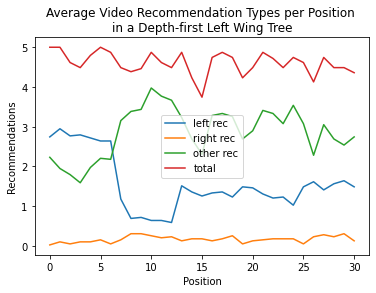

In [117]:
avg_per_position_left[['left rec', 'right rec', 'other rec', 'total']].plot(legend=True)

plt.ylabel('Recommendations')
plt.xlabel('Position')
plt.title(label='Average Video Recommendation Types per Position \nin a Depth-first Left Wing Tree')

Text(0.5, 1.0, 'Average Video Recommendation Types per position \nin a Depth-first Right Wing Tree')

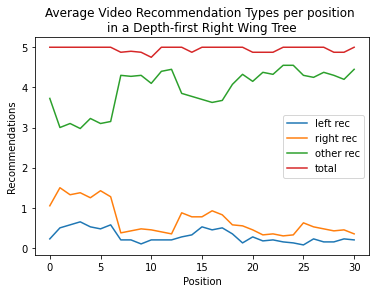

In [118]:
avg_per_position_right[['left rec', 'right rec', 'other rec', 'total']].plot(legend=True)

plt.ylabel('Recommendations')
plt.xlabel('Position')
plt.title(label='Average Video Recommendation Types per position \nin a Depth-first Right Wing Tree')

### Correlation Tags and Recommendation

In [23]:
for i in tags_left_bis:
    print(f'{i}: {avg_per_position_left["left rec"].corr(avg_per_position_left[i])}')

SocialJustice: 0.992811894353252
Socialist: 0.08753015966688231
PartisanLeft: 0.9933066218269007
AntiWhiteness: -0.0024812783380051295
LGBT: 0.1609729321780831
Mainstream News: 0.16100593841523309
LateNightTalkShow: 0.8910105044202945


In [24]:
for i in tags_right_bis:
    print(f'{i}: {avg_per_position_right["right rec"].corr(avg_per_position_right[i])}')

AntiSJW: 0.8997658670106824
Conspiracy: 0.21259522976480846
PartisanRight: 0.9933652397264741
ReligiousConservative: 0.7647191785651338
WhiteIdentitarian: nan
Libertarian: 0.904474874514058
MRA: nan
Provocateur: 0.9060313798973819
Mainstream News: 0.7431472228278482
LateNightTalkShow: 0.8719819512566845


### ii. Homepage videos depth

In [25]:
depth_homepage_data = {
    'id': [],
    'ply': [],
    'tree bias': [],
    'left rec' : [],
    'right rec': [],
    'other rec': [],
    'total' : [],
    'AntiSJW': [],
    'Conspiracy': [],
    'PartisanRight': [],
    'ReligiousConservative': [],
    'WhiteIdentitarian': [],
    'Libertarian': [],
    'MRA': [],
    'Provocateur': [],
    'Mainstream News': [],
    'LateNightTalkShow': [],
    'SocialJustice' : [],
    'Socialist' : [],
    'PartisanLeft': [],
    'AntiWhiteness': [],
    'LGBT': [],
    'Mainstream News': []
}

homepage_number = 0
for homepage in depth_homepages:
    homepage_number += 1
    #print(f'{homepage_number}/{len(depth_homepages)}')

    # check id
    id = (homepage.split('_')[4]).replace('.txt', '')

    # check ply
    ply = homepage.split('_')[1]
    tree_bias = None
    if id in depth_left_ids:
        tree_bias = 'Left'
    elif id in depth_right_ids:
        tree_bias = 'Right'
    else:
        #print(f'Problem')
        pass
    with open(path_depth_homepage + '\\' + homepage, 'r') as outfile:
        # array of urls
        lines = outfile.read().splitlines()
        lines = [i for i in lines if (not(i == None) and not(i == ''))]
        lines = lines[0 : min(10, len(lines))]

        count = {
            'left rec': 0,
            'right rec': 0,
            'other rec': 0,
            'total': 0,
            'AntiSJW': 0,
            'Conspiracy': 0,
            'PartisanRight': 0,
            'ReligiousConservative': 0,
            'WhiteIdentitarian': 0,
            'Libertarian': 0,
            'MRA': 0,
            'Provocateur': 0,
            'Mainstream News': 0,
            'LateNightTalkShow': 0,
            'SocialJustice' : 0,
            'Socialist' : 0,
            'PartisanLeft': 0,
            'AntiWhiteness': 0,
            'LGBT': 0,
            'Mainstream News': 0
        }
        none_count = 0
        for url in lines:
            content_creator = url_to_content_creator(url)
            if content_creator == None:
                none_count += 1
            else:
                bias, taggies = content_creator_to_bias(content_creator)
                count[bias] += 1
                count['total'] += 1
                for i in taggies:
                    if i in count.keys():
                        count[i] += 1
        for k, v in count.items():
            depth_homepage_data[k].append(v)
        depth_homepage_data['tree bias'].append(tree_bias)
        depth_homepage_data['ply'].append(ply)
        depth_homepage_data['id'].append(id)

    homepage_number += 1

C:\Users\mikad\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [26]:
for k, v in depth_homepage_data.items():
    print(k, len(v))

id 560
ply 560
tree bias 560
left rec 560
right rec 560
other rec 560
total 560
AntiSJW 560
Conspiracy 560
PartisanRight 560
ReligiousConservative 560
WhiteIdentitarian 560
Libertarian 560
MRA 560
Provocateur 560
Mainstream News 560
LateNightTalkShow 560
SocialJustice 560
Socialist 560
PartisanLeft 560
AntiWhiteness 560
LGBT 560


In [27]:
depth_homepage_csv = pd.DataFrame.from_dict(depth_homepage_data)
depth_homepage_csv.head(10)

,id,ply,tree bias,left rec,right rec,other rec,total,AntiSJW,Conspiracy,PartisanRight,...,Libertarian,MRA,Provocateur,Mainstream News,LateNightTalkShow,SocialJustice,Socialist,PartisanLeft,AntiWhiteness,LGBT
0,02f351fd-9736-4e1c-81bf-592980b39729,0,None,0,0,10,10,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,37fa5b1c-a5cb-4289-9831-9f44f42d631e,0,Left,0,0,10,10,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,457baab1-831e-444b-adeb-a4304f6ef053,0,Left,0,0,10,10,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7fdb62ab-a464-45c4-a1bf-be501207ee4d,0,Left,0,0,10,10,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8cd7ecaa-6378-43cf-b9f3-8e335437f0f4,0,Left,0,0,10,10,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,e6917e17-2486-4e48-a30e-ef1a365a1f9e,0,Left,0,0,10,10,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,e91d79e2-4e08-43f0-ae98-6d1f11c76236,0,Left,0,0,10,10,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,f47e3fb0-910c-4144-9605-0d15f683ae48,0,Left,0,0,10,10,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,f4b9f3a7-cad6-4eef-8e56-b2573b8eb778,0,Right,0,1,9,10,1,0,1,...,0,0,0,0,0,0,0,0,0,0
9,f7eafc12-9354-4f23-a6de-00d580bae02b,0,Left,0,0,10,10,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
tags_right_bis = ['AntiSJW', 'Conspiracy', 'PartisanRight', 'ReligiousConservative', 'WhiteIdentitarian', 'Libertarian', 'MRA', 'Provocateur', 'Mainstream News', 'LateNightTalkShow']
tags_left_bis = ['SocialJustice', 'Socialist', 'PartisanLeft', 'AntiWhiteness', 'LGBT', 'Mainstream News', 'LateNightTalkShow']

right_depth_homepage = depth_homepage_csv[depth_homepage_csv['tree bias'] == 'Right'][['ply', 'left rec', 'right rec', 'other rec', 'total', 'AntiSJW', 'Conspiracy', 'PartisanRight', 'ReligiousConservative', 'WhiteIdentitarian', 'Libertarian', 'MRA', 'Provocateur', 'Mainstream News', 'LateNightTalkShow']]
left_depth_homepage = depth_homepage_csv[depth_homepage_csv['tree bias'] == 'Left'][['ply', 'left rec', 'right rec', 'other rec', 'total', 'SocialJustice', 'Socialist', 'PartisanLeft', 'AntiWhiteness', 'LGBT', 'Mainstream News', 'LateNightTalkShow']]

avg_per_position_right_depth_homepage = right_depth_homepage.groupby('ply').mean()
avg_per_position_left_depth_homepage = left_depth_homepage.groupby('ply').mean()

### Table organize by ply

In [29]:
avg_per_position_right_depth_homepage

,left rec,right rec,other rec,total,AntiSJW,Conspiracy,PartisanRight,ReligiousConservative,WhiteIdentitarian,Libertarian,MRA,Provocateur,Mainstream News,LateNightTalkShow
ply,,,,,,,,,,,,,,
0,0.000,0.025,9.975,10.0,0.025,0.000,0.025,0.000,0.0,0.000,0.000,0.000,0.000,0.000
1,0.250,1.500,8.250,10.0,0.725,0.275,1.175,0.225,0.0,0.450,0.025,0.150,0.850,0.100
2,0.425,1.925,7.650,10.0,1.350,0.375,1.350,0.625,0.0,0.875,0.000,0.125,0.775,0.100
3,0.350,1.400,8.250,10.0,0.975,0.325,1.025,0.550,0.0,0.725,0.000,0.100,0.475,0.125
4,0.450,1.575,7.975,10.0,0.975,0.225,1.125,0.400,0.0,0.375,0.000,0.100,0.725,0.200
5,0.450,1.700,7.850,10.0,0.925,0.250,1.250,0.425,0.0,0.500,0.000,0.050,0.900,0.125
6,0.275,1.350,8.375,10.0,0.750,0.250,0.975,0.300,0.0,0.400,0.025,0.025,0.750,0.025


In [30]:
avg_per_position_left_depth_homepage

,left rec,right rec,other rec,total,SocialJustice,Socialist,PartisanLeft,AntiWhiteness,LGBT,Mainstream News,LateNightTalkShow
ply,,,,,,,,,,,
0,0.000000,0.076923,9.923077,10.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
1,1.615385,0.564103,7.820513,10.0,1.307692,0.666667,1.743590,0.0,0.128205,0.666667,0.333333
2,1.358974,0.692308,7.948718,10.0,1.307692,0.897436,1.487179,0.0,0.153846,0.461538,0.102564
3,1.333333,0.871795,7.794872,10.0,1.230769,0.692308,1.435897,0.0,0.076923,0.307692,0.282051
4,1.461538,0.820513,7.717949,10.0,1.179487,0.692308,1.538462,0.0,0.051282,0.564103,0.205128
5,1.564103,0.923077,7.512821,10.0,1.512821,0.871795,1.717949,0.0,0.025641,0.307692,0.410256
6,1.641026,0.769231,7.589744,10.0,1.512821,1.051282,1.641026,0.0,0.102564,0.358974,0.256410


Text(0.5, 1.0, 'Average Homepage Recommendation Types Per Ply \nin a Depth-first Left Wing Tree')

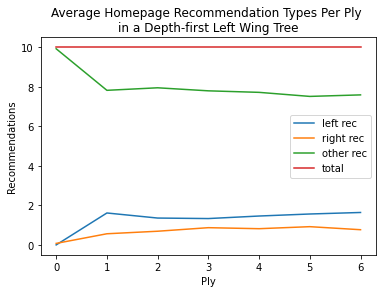

In [119]:
avg_per_position_left_depth_homepage[['left rec', 'right rec', 'other rec', 'total']].plot(legend=True)

plt.ylabel('Recommendations')
plt.xlabel('Ply')
plt.title(label='Average Homepage Recommendation Types Per Ply \nin a Depth-first Left Wing Tree')

Text(0.5, 1.0, 'Average Homepage Recommendation Types per Ply \nin a Depth-first Right Wing Tree')

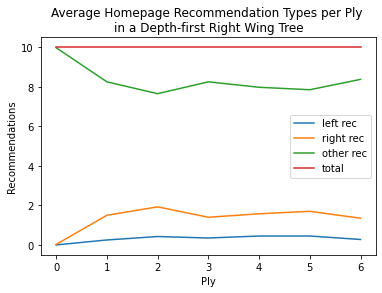

In [120]:
avg_per_position_right_depth_homepage[['left rec', 'right rec', 'other rec', 'total']].plot(legend=True)

plt.ylabel('Recommendations')
plt.xlabel('Ply')
plt.title(label='Average Homepage Recommendation Types per Ply \nin a Depth-first Right Wing Tree')

### Correlation Calculation

In [33]:
for i in tags_left_bis:
    print(f'{i}: {avg_per_position_left_depth_homepage["left rec"].corr(avg_per_position_left_depth_homepage[i])}')

SocialJustice: 0.9815915460343936
Socialist: 0.9182620915019842
PartisanLeft: 0.9962969843394927
AntiWhiteness: nan
LGBT: 0.5819188485576934
Mainstream News: 0.790991870129556
LateNightTalkShow: 0.7831574092268412


In [34]:
for i in tags_right_bis:
    print(f'{i}: {avg_per_position_right_depth_homepage["right rec"].corr(avg_per_position_right_depth_homepage[i])}')

AntiSJW: 0.9484347703714044
Conspiracy: 0.9214591771159386
PartisanRight: 0.9958129190618815
ReligiousConservative: 0.8381611703972798
WhiteIdentitarian: nan
Libertarian: 0.8289853269500895
MRA: 0.07908165838507114
Provocateur: 0.6769844790533703
Mainstream News: 0.9152775214039418
LateNightTalkShow: 0.6674090027441367


# Survey

### i. Survey tree

In [35]:
importer = JsonImporter()

survey_left_ids = []
survey_right_ids = []

for tree in survey_trees:
    id = (tree.split('_')[4]).replace('.txt', '')
    if 'Right' in tree:
        survey_right_ids.append(id)
    else:
        survey_left_ids.append(id)
print('Done')

Done


In [36]:
survey_data = {
    'id': [],
    'position': [],
    'ply': [],
    'tree bias': [],
    'left rec': [],
    'right rec': [],
    'other rec': [],
    'total': [],
    'video bias': [],
    'video type': [],
    'sampled type': [],
    'AntiSJW': [],
    'Conspiracy': [],
    'PartisanRight': [],
    'ReligiousConservative': [],
    'WhiteIdentitarian': [],
    'Libertarian': [],
    'MRA': [],
    'Provocateur': [],
    'Mainstream News': [],
    'LateNightTalkShow': [],
    'SocialJustice' : [],
    'Socialist' : [],
    'PartisanLeft': [],
    'AntiWhiteness': [],
    'LGBT': [],
    'Mainstream News': []
}

#create the csv for the trees
tree_number = 0
for tree in survey_trees:
    tree_number += 1
    print(f'{tree_number}/{len(survey_trees)}')
    id = (tree.split('_')[4]).replace('.txt', '')
    tree_bias = None
    if id in survey_left_ids:
        tree_bias = 'Left'
    elif id in survey_right_ids:
        tree_bias = 'Right'
    else:
        print(f'Problem')
    #'id', 'tree bias', 'left rec', 'right rec', 'other', 'total', 'video bias'
    with open(path_survey_trees + '\\' + tree, 'r') as outfile:
        data = outfile.read()
        root = importer.import_(data)
        position = 0
        for t in anytree.PreOrderIter(root):
            if t.id != 'dummy':
                survey_data['id'].append(id)
                survey_data['tree bias'].append(tree_bias)
                survey_data['position'].append(position)
                count = {
                    'left rec': 0,
                    'right rec': 0,
                    'other rec' : 0,
                    'total': 0,
                    'AntiSJW': 0,
                    'Conspiracy': 0,
                    'PartisanRight': 0,
                    'ReligiousConservative': 0,
                    'WhiteIdentitarian': 0,
                    'Libertarian': 0,
                    'MRA': 0,
                    'Provocateur': 0,
                    'Mainstream News': 0,
                    'LateNightTalkShow': 0,
                    'SocialJustice' : 0,
                    'Socialist' : 0,
                    'PartisanLeft': 0,
                    'AntiWhiteness': 0,
                    'LGBT': 0,
                    'Mainstream News': 0
                }
                # check that you only want top 5
                recommended_videos = t.top_10_recommended
                recommended_videos = [i for i in recommended_videos if not(i == None)]
                recommended_videos = recommended_videos[0:min(5, len(recommended_videos))]
                for rec in recommended_videos:
                    content_creator = url_to_content_creator(rec)
                    if content_creator != None:
                        bias, taggies = content_creator_to_bias(content_creator)
                        count[bias] += 1
                        count['total'] += 1
                        for i in taggies:
                            if i in count.keys():
                                count[i] += 1
                    else:
                        print('Issue')
                        count['other rec']

                for k, v in count.items():
                    survey_data[k].append(v)

                #survey_data['total'].append(5)
                video_bias = content_creator_to_bias(t.video['content creator'])
                survey_data['video bias'].append(video_bias)
                survey_data['video type'].append(t.actual_video_type)
                survey_data['sampled type'].append(t.sampled_type)

                ply = np.mod(position, 3)

                survey_data['ply'].append(ply)
                position += 1
print(len(urls_to_visit))

1/79
2/79
3/79
4/79
5/79
6/79
7/79
8/79
9/79
10/79


C:\Users\mikad\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


11/79
12/79
13/79
14/79
15/79
16/79
17/79
18/79
19/79
20/79
21/79
22/79
23/79
24/79
25/79
26/79
27/79
28/79
29/79
30/79
31/79
32/79
33/79
34/79
35/79
36/79
37/79
38/79
39/79
40/79
41/79
42/79
43/79
44/79
45/79
46/79
47/79
48/79
49/79
50/79
51/79
52/79
53/79
54/79
55/79
56/79
57/79
58/79
59/79
60/79
61/79
62/79
63/79
64/79
65/79
66/79
67/79
68/79
69/79
70/79
71/79
72/79
73/79
74/79
75/79
76/79
77/79
78/79
79/79
0


In [37]:
for k, v in survey_data.items():
    print(k, len(v))

id 1896
position 1896
ply 1896
tree bias 1896
left rec 1896
right rec 1896
other rec 1896
total 1896
video bias 1896
video type 1896
sampled type 1896
AntiSJW 1896
Conspiracy 1896
PartisanRight 1896
ReligiousConservative 1896
WhiteIdentitarian 1896
Libertarian 1896
MRA 1896
Provocateur 1896
Mainstream News 1896
LateNightTalkShow 1896
SocialJustice 1896
Socialist 1896
PartisanLeft 1896
AntiWhiteness 1896
LGBT 1896


In [38]:
survey_csv = pd.DataFrame.from_dict(survey_data)
survey_csv.head(20)

,id,position,ply,tree bias,left rec,right rec,other rec,total,video bias,video type,...,Libertarian,MRA,Provocateur,Mainstream News,LateNightTalkShow,SocialJustice,Socialist,PartisanLeft,AntiWhiteness,LGBT
0,0bd77d4c-a0f7-4b58-b048-06289937641a,0,0,Left,2,0,3,5,"(left rec, [AntiTheist, PartisanLeft, SocialJu...",curated,...,0,0,0,0,0,2,0,2,0,0
1,0bd77d4c-a0f7-4b58-b048-06289937641a,1,1,Left,0,0,0,0,"(left rec, [AntiTheist, PartisanLeft, SocialJu...",curated,...,0,0,0,0,0,0,0,0,0,0
2,0bd77d4c-a0f7-4b58-b048-06289937641a,2,2,Left,5,0,0,5,"(left rec, [AntiTheist, PartisanLeft, SocialJu...",curated,...,0,0,0,0,0,5,0,5,0,0
3,0bd77d4c-a0f7-4b58-b048-06289937641a,3,0,Left,1,0,1,2,"(left rec, [AntiTheist, PartisanLeft, SocialJu...",curated,...,0,0,0,0,0,1,0,1,0,0
4,0bd77d4c-a0f7-4b58-b048-06289937641a,4,1,Left,0,0,0,0,"(left rec, [PartisanLeft, SocialJustice, Socia...",curated,...,0,0,0,0,0,0,0,0,0,0
5,0bd77d4c-a0f7-4b58-b048-06289937641a,5,2,Left,0,0,0,0,"(left rec, [PartisanLeft, SocialJustice, Socia...",curated,...,0,0,0,0,0,0,0,0,0,0
6,0bd77d4c-a0f7-4b58-b048-06289937641a,6,0,Left,0,0,0,0,"(left rec, [PartisanLeft, SocialJustice, Socia...",curated,...,0,0,0,0,0,0,0,0,0,0
7,0bd77d4c-a0f7-4b58-b048-06289937641a,7,1,Left,0,0,0,0,"(left rec, [PartisanLeft, SocialJustice, Socia...",curated,...,0,0,0,0,0,0,0,0,0,0
8,0bd77d4c-a0f7-4b58-b048-06289937641a,8,2,Left,5,0,0,5,"(left rec, [LGBT, PartisanLeft, SocialJustice,...",curated,...,0,0,0,0,0,5,5,5,0,4
9,0bd77d4c-a0f7-4b58-b048-06289937641a,9,0,Left,4,0,1,5,"(left rec, [LGBT, PartisanLeft, SocialJustice,...",curated,...,0,0,0,0,0,4,4,4,0,4


In [39]:
tags_right_bis = ['AntiSJW', 'Conspiracy', 'PartisanRight', 'ReligiousConservative', 'WhiteIdentitarian', 'Libertarian', 'MRA', 'Provocateur', 'Mainstream News', 'LateNightTalkShow']
tags_left_bis = ['SocialJustice', 'Socialist', 'PartisanLeft', 'AntiWhiteness', 'LGBT', 'Mainstream News', 'LateNightTalkShow']

right_survey = survey_csv[survey_csv['tree bias'] == 'Right'][['position', 'left rec', 'right rec', 'other rec', 'total', 'AntiSJW', 'Conspiracy', 'PartisanRight', 'ReligiousConservative', 'WhiteIdentitarian', 'Libertarian', 'MRA', 'Provocateur', 'Mainstream News', 'LateNightTalkShow']]
left_survey = survey_csv[survey_csv['tree bias'] == 'Left'][['position', 'left rec', 'right rec', 'other rec', 'total', 'SocialJustice', 'Socialist', 'PartisanLeft', 'AntiWhiteness', 'LGBT', 'Mainstream News', 'LateNightTalkShow']]

avg_per_position_right_survey = right_survey.groupby('position').mean()
avg_per_position_left_survey = left_survey.groupby('position').mean()

### Table organized by position

In [40]:
avg_per_position_right_survey

,left rec,right rec,other rec,total,AntiSJW,Conspiracy,PartisanRight,ReligiousConservative,WhiteIdentitarian,Libertarian,MRA,Provocateur,Mainstream News,LateNightTalkShow
position,,,,,,,,,,,,,,
0,0.600,1.125,3.275,5.000,0.500,0.125,1.000,0.075,0.0,0.300,0.000,0.325,0.850,0.200
1,0.200,1.825,2.850,4.875,0.675,0.325,1.475,0.125,0.0,0.500,0.000,0.150,1.150,0.075
2,0.300,1.800,2.775,4.875,0.825,0.375,1.275,0.125,0.0,0.600,0.000,0.175,1.050,0.300
3,0.325,2.225,2.450,5.000,0.825,0.350,1.700,0.225,0.0,0.575,0.000,0.075,1.475,0.275
4,0.700,0.675,3.500,4.875,0.250,0.125,0.525,0.100,0.0,0.225,0.000,0.025,0.850,0.175
5,0.925,1.300,2.775,5.000,0.350,0.175,1.175,0.200,0.0,0.300,0.000,0.000,1.550,0.375
6,0.850,1.625,2.400,4.875,0.475,0.250,1.400,0.250,0.0,0.400,0.000,0.000,1.900,0.225
7,0.875,1.675,2.325,4.875,0.650,0.350,1.400,0.400,0.0,0.525,0.000,0.025,1.850,0.275
8,0.575,1.375,3.050,5.000,0.675,0.200,1.075,0.075,0.0,0.275,0.000,0.300,1.100,0.150


In [41]:
avg_per_position_left_survey

,left rec,right rec,other rec,total,SocialJustice,Socialist,PartisanLeft,AntiWhiteness,LGBT,Mainstream News,LateNightTalkShow
position,,,,,,,,,,,
0,2.538462,0.025641,1.897436,4.461538,2.384615,1.538462,2.410256,0.0,0.179487,0.205128,0.230769
1,2.769231,0.179487,1.564103,4.512821,2.692308,1.512821,2.717949,0.0,0.128205,0.333333,0.564103
2,2.769231,0.307692,1.410256,4.487179,2.743590,1.282051,2.717949,0.0,0.000000,0.282051,0.846154
3,2.897436,0.256410,1.487179,4.641026,2.846154,1.487179,2.743590,0.0,0.051282,0.256410,0.871795
4,1.692308,0.076923,2.307692,4.076923,1.615385,1.153846,1.615385,0.0,0.256410,0.256410,0.179487
5,2.230769,0.179487,1.871795,4.282051,2.076923,1.307692,2.102564,0.0,0.256410,0.307692,0.717949
6,2.512821,0.153846,1.666667,4.333333,2.358974,1.333333,2.435897,0.0,0.230769,0.179487,1.000000
7,2.769231,0.128205,1.333333,4.230769,2.538462,1.307692,2.666667,0.0,0.076923,0.256410,1.076923
8,1.897436,0.307692,2.128205,4.333333,1.769231,1.410256,1.666667,0.0,0.179487,0.282051,0.102564


### Plots

Text(0.5, 1.0, 'Average Video Recommendation Types Per Position \nin a Survey-inspired Left Wing Tree')

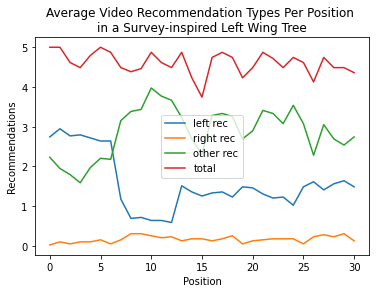

In [121]:
avg_per_position_left[['left rec', 'right rec', 'other rec', 'total']].plot(legend=True)

plt.ylabel('Recommendations')
plt.xlabel('Position')
plt.title(label='Average Video Recommendation Types Per Position \nin a Survey-inspired Left Wing Tree')

Text(0.5, 1.0, 'Average Video Recommendation Types Per Position \nin a Survey-inspired Left Wing Tree')

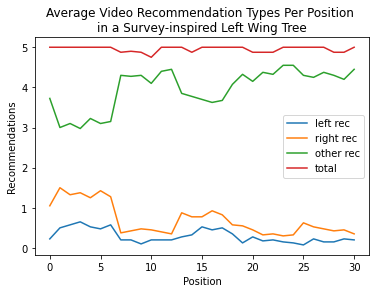

In [122]:
avg_per_position_right[['left rec', 'right rec', 'other rec', 'total']].plot(legend=True)

plt.ylabel('Recommendations')
plt.xlabel('Position')
plt.title(label='Average Video Recommendation Types Per Position \nin a Survey-inspired Right Wing Tree')

### Correlation

In [44]:
for i in tags_left_bis:
    print(f'{i}: {avg_per_position_left_survey["left rec"].corr(avg_per_position_left_survey[i])}')

SocialJustice: 0.9633482607063781
Socialist: 0.4822244499329655
PartisanLeft: 0.9749579827195552
AntiWhiteness: nan
LGBT: -0.08054134306952539
Mainstream News: -0.19047171549882758
LateNightTalkShow: 0.4755342879040484


In [45]:
for i in tags_right_bis:
    print(f'{i}: {avg_per_position_right_survey["right rec"].corr(avg_per_position_right_survey[i])}')

AntiSJW: 0.876808598627992
Conspiracy: 0.7442514920234705
PartisanRight: 0.9382572893069822
ReligiousConservative: 0.06612805423312897
WhiteIdentitarian: nan
Libertarian: 0.751389325702991
MRA: 0.05455959916911988
Provocateur: -0.16555641638579172
Mainstream News: 0.6096456369599903
LateNightTalkShow: -0.012112506029374475


### ii. Homepage

In [46]:
survey_homepage_data = {
    'id': [],
    'ply': [],
    'tree bias': [],
    'left rec' : [],
    'right rec': [],
    'other rec': [],
    'total' : [],
    'AntiSJW': [],
    'Conspiracy': [],
    'PartisanRight': [],
    'ReligiousConservative': [],
    'WhiteIdentitarian': [],
    'Libertarian': [],
    'MRA': [],
    'Provocateur': [],
    'Mainstream News': [],
    'LateNightTalkShow': [],
    'SocialJustice' : [],
    'Socialist' : [],
    'PartisanLeft': [],
    'AntiWhiteness': [],
    'LGBT': [],
    'Mainstream News': []
}

homepage_number = 0
for homepage in survey_homepages:
    homepage_number += 1
    #print(f'{homepage_number}/{len(survey_homepages)}')

    # check id
    id = (homepage.split('_')[5]).replace('.txt', '')

    # check ply
    ply = homepage.split('_')[2]
    tree_bias = None
    if id in survey_left_ids:
        tree_bias = 'Left'
    elif id in survey_right_ids:
        tree_bias = 'Right'
    else:
        print(f'Problem')

    with open(path_survey_homepage + '\\' + homepage, 'r') as outfile:
        # array of urls
        lines = outfile.read().splitlines()
        lines = [i for i in lines if (not(i == None) and not(i == ''))]
        lines = lines[0 : min(10, len(lines))]

        count = {
            'left rec': 0,
            'right rec': 0,
            'other rec': 0,
            'total': 0,
            'AntiSJW': 0,
            'Conspiracy': 0,
            'PartisanRight': 0,
            'ReligiousConservative': 0,
            'WhiteIdentitarian': 0,
            'Libertarian': 0,
            'MRA': 0,
            'Provocateur': 0,
            'Mainstream News': 0,
            'LateNightTalkShow': 0,
            'SocialJustice' : 0,
            'Socialist' : 0,
            'PartisanLeft': 0,
            'AntiWhiteness': 0,
            'LGBT': 0,
            'Mainstream News': 0
        }
        none_count = 0
        for url in lines:
            content_creator = url_to_content_creator(url)
            if content_creator == None:
                none_count += 1
            else:
                bias, taggies = content_creator_to_bias(content_creator)
                count[bias] += 1
                count['total'] += 1
                for i in taggies:
                    if i in count.keys():
                        count[i] += 1
        for k, v in count.items():
            survey_homepage_data[k].append(v)
        survey_homepage_data['tree bias'].append(tree_bias)
        survey_homepage_data['ply'].append(ply)
        survey_homepage_data['id'].append(id)

    homepage_number += 1

C:\Users\mikad\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [47]:
for k, v in survey_homepage_data.items():
    print(k, len(v))

id 539
ply 539
tree bias 539
left rec 539
right rec 539
other rec 539
total 539
AntiSJW 539
Conspiracy 539
PartisanRight 539
ReligiousConservative 539
WhiteIdentitarian 539
Libertarian 539
MRA 539
Provocateur 539
Mainstream News 539
LateNightTalkShow 539
SocialJustice 539
Socialist 539
PartisanLeft 539
AntiWhiteness 539
LGBT 539


In [48]:
survey_homepage_csv = pd.DataFrame.from_dict(survey_homepage_data)
survey_homepage_csv.head(10)

,id,ply,tree bias,left rec,right rec,other rec,total,AntiSJW,Conspiracy,PartisanRight,...,Libertarian,MRA,Provocateur,Mainstream News,LateNightTalkShow,SocialJustice,Socialist,PartisanLeft,AntiWhiteness,LGBT
0,0bd77d4c-a0f7-4b58-b048-06289937641a,0,Left,0,0,10,10,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,301c83f9-f006-4434-ab4d-416e1ee02765,0,Left,0,0,10,10,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7dd404b3-744e-4f20-955f-34b14e41bd14,0,Left,0,0,10,10,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9ae628dd-03e4-42fe-bc23-e116a453d7ac,0,Left,1,0,9,10,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4,ba162d7b-322e-4d32-acd4-e16f9e43a442,0,Left,0,0,10,10,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,f52b4f7c-2aa8-4d8f-a872-ad4fe1b0ca84,0,Left,0,0,10,10,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,fd916f80-1976-4fde-b77a-37eb5ec41004,0,Left,0,0,10,10,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,4255f19e-82db-4645-99bb-5db2d1ff725a,0,Left,0,0,10,10,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5786706b-e197-49c0-b59c-ecee967b612e,0,Left,0,0,10,10,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,702d5ade-9e60-48b5-a122-e7dc097576e6,0,Left,0,0,10,10,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
right_survey_homepage = survey_homepage_csv[survey_homepage_csv['tree bias'] == 'Right'][['ply', 'left rec', 'right rec', 'other rec', 'total', 'AntiSJW', 'Conspiracy', 'PartisanRight', 'ReligiousConservative', 'WhiteIdentitarian', 'Libertarian', 'MRA', 'Provocateur', 'Mainstream News', 'LateNightTalkShow']]
left_survey_homepage = survey_homepage_csv[survey_homepage_csv['tree bias'] == 'Left'][['ply', 'left rec', 'right rec', 'other rec', 'total', 'SocialJustice', 'Socialist', 'PartisanLeft', 'AntiWhiteness', 'LGBT', 'Mainstream News', 'LateNightTalkShow']]

avg_per_position_right_survey_homepage = right_survey_homepage.groupby('ply').mean()
avg_per_position_left_survey_homepage = left_survey_homepage.groupby('ply').mean()

### Table organize by ply

In [50]:
avg_per_position_right_survey_homepage

,left rec,right rec,other rec,total,AntiSJW,Conspiracy,PartisanRight,ReligiousConservative,WhiteIdentitarian,Libertarian,MRA,Provocateur,Mainstream News,LateNightTalkShow
ply,,,,,,,,,,,,,,
0,0.000000,0.210526,9.789474,10.0,0.131579,0.000000,0.210526,0.000000,0.0,0.000000,0.0,0.000000,0.078947,0.000000
1,0.447368,2.368421,7.184211,10.0,1.052632,0.421053,1.763158,0.421053,0.0,0.605263,0.0,0.026316,1.473684,0.131579
2,0.684211,2.947368,6.368421,10.0,1.394737,0.263158,2.394737,0.552632,0.0,0.684211,0.0,0.105263,1.894737,0.184211
3,0.631579,3.447368,5.921053,10.0,1.763158,0.473684,2.868421,0.657895,0.0,0.921053,0.0,0.236842,1.921053,0.157895
4,0.631579,4.131579,5.236842,10.0,2.157895,0.578947,3.421053,0.789474,0.0,1.026316,0.0,0.394737,2.236842,0.184211
5,0.526316,3.947368,5.526316,10.0,2.184211,0.447368,3.210526,0.947368,0.0,1.026316,0.0,0.289474,1.921053,0.157895
6,0.657895,4.105263,5.236842,10.0,2.315789,0.473684,3.236842,1.052632,0.0,1.342105,0.0,0.236842,2.157895,0.105263


In [51]:
avg_per_position_left_survey_homepage

,left rec,right rec,other rec,total,SocialJustice,Socialist,PartisanLeft,AntiWhiteness,LGBT,Mainstream News,LateNightTalkShow
ply,,,,,,,,,,,
0,0.102564,0.076923,9.820513,10.0,0.076923,0.000000,0.128205,0.0,0.000000,0.025641,0.025641
1,2.000000,0.615385,7.384615,10.0,1.820513,1.230769,2.051282,0.0,0.230769,0.410256,0.205128
2,2.794872,0.538462,6.666667,10.0,2.641026,1.897436,2.846154,0.0,0.256410,0.333333,0.333333
3,3.333333,0.820513,5.846154,10.0,3.102564,2.410256,3.282051,0.0,0.358974,0.435897,0.205128
4,3.461538,0.743590,5.794872,10.0,3.256410,2.230769,3.384615,0.0,0.435897,0.589744,0.153846
5,3.487179,0.897436,5.615385,10.0,3.179487,2.358974,3.564103,0.0,0.230769,0.615385,0.179487
6,3.666667,0.820513,5.512821,10.0,3.487179,2.589744,3.692308,0.0,0.307692,0.461538,0.205128


Text(0.5, 1.0, 'Average Homepage Recommendation Types Per Ply \nin a Survey-inspired Left Wing Tree')

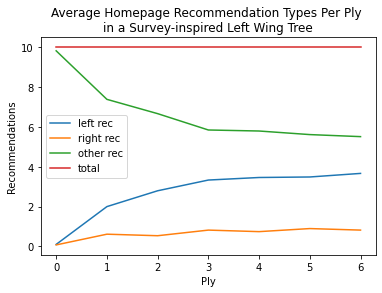

In [123]:
avg_per_position_left_survey_homepage[['left rec', 'right rec', 'other rec', 'total']].plot(legend=True)

plt.ylabel('Recommendations')
plt.xlabel('Ply')
plt.title(label='Average Homepage Recommendation Types Per Ply \nin a Survey-inspired Left Wing Tree')

Text(0.5, 1.0, 'Average Homepage Recommendation Types Per Ply \nin a Survey-inspired Right Wing Tree')

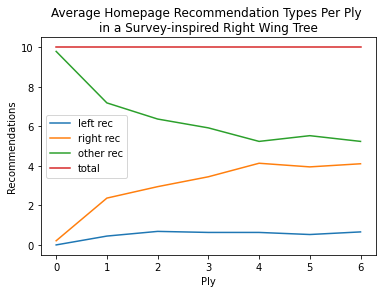

In [124]:
avg_per_position_right_survey_homepage[['left rec', 'right rec', 'other rec', 'total']].plot(legend=True)

plt.ylabel('Recommendations')
plt.xlabel('Ply')
plt.title(label='Average Homepage Recommendation Types Per Ply \nin a Survey-inspired Right Wing Tree')

### Correlation Calculation

In [54]:
for i in tags_left_bis:
    print(f'{i}: {avg_per_position_left_survey_homepage["left rec"].corr(avg_per_position_left_survey_homepage[i])}')

SocialJustice: 0.9992549999770497
Socialist: 0.9947735459287185
PartisanLeft: 0.9990375349189352
AntiWhiteness: nan
LGBT: 0.8731313473058108
Mainstream News: 0.9011026032785264
LateNightTalkShow: 0.6004074736545997


In [55]:
for i in tags_right_bis:
    print(f'{i}: {avg_per_position_right_survey_homepage["right rec"].corr(avg_per_position_right_survey_homepage[i])}')

AntiSJW: 0.9876737676958112
Conspiracy: 0.9131549738869476
PartisanRight: 0.9971197899422326
ReligiousConservative: 0.9588488133974998
WhiteIdentitarian: nan
Libertarian: 0.9669882296306502
MRA: nan
Provocateur: 0.851409619380025
Mainstream News: 0.9745393846651288
LateNightTalkShow: 0.7961579379393926


# Breadth

In [56]:

breadth_left_ids = []
breadth_right_ids = []

breadth_right_trees = []
breadth_left_trees = []

for trees in breadth_trees:
    id = (trees.split('_')[3]).replace('.txt', '')
    with open(path_breadth_trees + '\\' + trees, 'r') as outfile:
        data = outfile.read()
        root = importer.import_(data)
        if root.id in right_wing_seeds:
            breadth_right_ids.append(id)
        else:
            breadth_left_ids.append(id)

breadth_data = {
    'id': [],
    'ply': [],
    'left rec': [],
    'right rec': [],
    'other rec' : [],
    'total': [],
    'tree bias': [],
    'video bias': [],
    'content_creator': [],
    'AntiSJW': [],
    'Conspiracy': [],
    'PartisanRight': [],
    'ReligiousConservative': [],
    'WhiteIdentitarian': [],
    'Libertarian': [],
    'MRA': [],
    'Provocateur': [],
    'Mainstream News': [],
    'LateNightTalkShow': [],
    'SocialJustice' : [],
    'Socialist' : [],
    'PartisanLeft': [],
    'AntiWhiteness': [],
    'LGBT': [],
    'Mainstream News': [],
}

#create the csv for the trees
tree_number = 0
for tree in breadth_trees:
    tree_number += 1
    print(f'{tree_number}/{len(breadth_trees)}', end='')
    id = (tree.split('_')[3]).replace('.txt', '')
    tree_bias = None
    if id in breadth_left_ids:
        tree_bias = 'Left'
    elif id in breadth_right_ids:
        tree_bias = 'Right'
    else:
        print(f'Problem')

    print(f': {tree_bias} || ', end='')
    #'id', 'tree bias', 'left rec', 'right rec', 'other', 'total', 'video bias'
    with open(path_breadth_trees + '\\' + tree, 'r') as outfile:
        data = outfile.read()
        root = importer.import_(data)
        print(root.video['content creator'])
        for t in anytree.LevelOrderIter(root):
            if t.title != None:
                breadth_data['id'].append(id)
                breadth_data['tree bias'].append(tree_bias)

                count = {
                    'left rec': 0,
                    'right rec': 0,
                    'other rec' : 0,
                    'total': 0,
                    'AntiSJW': 0,
                    'Conspiracy': 0,
                    'PartisanRight': 0,
                    'ReligiousConservative': 0,
                    'WhiteIdentitarian': 0,
                    'Libertarian': 0,
                    'MRA': 0,
                    'Provocateur': 0,
                    'Mainstream News': 0,
                    'LateNightTalkShow': 0,
                    'SocialJustice' : 0,
                    'Socialist' : 0,
                    'PartisanLeft': 0,
                    'AntiWhiteness': 0,
                    'LGBT': 0,
                    'Mainstream News': 0
                }
                children = t.children
                if all(c.video != None for c in children) == True:
                    for child in children:
                        if child.video == None:
                            print('Bad 1')
                        bias, taggies = content_creator_to_bias(child.video['content creator'])
                        count[bias] += 1
                        count['total'] += 1
                        for i in taggies:
                            if i in count.keys():
                                count[i] += 1

                        if bias == None:
                            print('Bad 2')

                    #breadth_data['total'].append(3)

                for k, v in count.items():
                    breadth_data[k].append(v)

                video_bias = content_creator_to_bias(t.video['content creator'])
                breadth_data['video bias'].append(video_bias)
                ply = t.depth
                breadth_data['ply'].append(ply)
                if t.video != None:
                    breadth_data['content_creator'].append(t.video['content creator'])
                else:
                    breadth_data['content_creator'].append(None)
print(len(urls_to_visit))

1/73: Right || Tim Pool
2/73: Left || Vox
3/73: Left || Destiny
4/73: Right || The Rubin Report
5/73: Right || StevenCrowder


C:\Users\mikad\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


6/73: Left || Innuendo Studios
7/73: Left || Destiny
8/73: Left || Big Joel
9/73: Right || PragerU
10/73: Right || Blaire White
11/73: Left || hbomberguy
12/73: Left || Vaush
13/73: Left || The Majority Report w/ Sam Seder
14/73: Left || Vaush
15/73: Left || Vaush
16/73: Left || Shaun
17/73: Right || Tim Pool
18/73: Right || StevenCrowder
19/73: Right || Charlie Kirk
20/73: Right || The Rubin Report
21/73: Right || Michael Knowles
22/73: Right || Paul Joseph Watson
23/73: Right || Mark Dice
24/73: Right || Lauren Southern
25/73: Left || HasanAbi
26/73: Left || Vaush
27/73: Right || Sargon of Akkad
28/73: Right || Paul Joseph Watson
29/73: Left || The Majority Report w/ Sam Seder
30/73: Right || Michael Knowles
31/73: Left || Vaush
32/73: Left || hbomberguy
33/73: Left || Innuendo Studios
34/73: Left || Three Arrows
35/73: Right || The Daily Wire
36/73: Left || Big Joel
37/73: Right || Lauren Southern
38/73: Left || The Majority Report w/ Sam Seder
39/73: Left || Vaush
40/73: Left || Vo

In [57]:
for k, v in breadth_data.items():
    print(k, len(v))

id 8833
ply 8833
left rec 8833
right rec 8833
other rec 8833
total 8833
tree bias 8833
video bias 8833
content_creator 8833
AntiSJW 8833
Conspiracy 8833
PartisanRight 8833
ReligiousConservative 8833
WhiteIdentitarian 8833
Libertarian 8833
MRA 8833
Provocateur 8833
Mainstream News 8833
LateNightTalkShow 8833
SocialJustice 8833
Socialist 8833
PartisanLeft 8833
AntiWhiteness 8833
LGBT 8833


In [92]:
breadth_csv = pd.DataFrame.from_dict(breadth_data)
breadth_csv.head(15)

right_breadth = breadth_csv[(breadth_csv['tree bias'] == 'Right') & (breadth_csv['ply'] < 4)][['ply', 'left rec', 'right rec', 'other rec', 'total',  'video bias','AntiSJW', 'Conspiracy', 'PartisanRight', 'ReligiousConservative', 'WhiteIdentitarian', 'Libertarian', 'MRA', 'Provocateur', 'Mainstream News', 'LateNightTalkShow']]
left_breadth = breadth_csv[(breadth_csv['tree bias'] == 'Left') & (breadth_csv['ply'] < 4)][['ply', 'left rec', 'right rec', 'other rec', 'total', 'video bias','SocialJustice', 'Socialist', 'PartisanLeft', 'AntiWhiteness', 'LGBT', 'Mainstream News', 'LateNightTalkShow']]

avg_per_position_right_breadth = right_breadth.groupby('ply').mean()
avg_per_position_left_breadth = left_breadth.groupby('ply').mean()

### Table organized by ply

In [93]:
avg_per_position_right_breadth

,left rec,right rec,other rec,total,AntiSJW,Conspiracy,PartisanRight,ReligiousConservative,WhiteIdentitarian,Libertarian,MRA,Provocateur,Mainstream News,LateNightTalkShow
ply,,,,,,,,,,,,,,
0,0.138889,1.277778,1.583333,3.000000,0.611111,0.194444,1.083333,0.166667,0.0,0.361111,0.0,0.250000,0.583333,0.138889
1,0.203704,0.972222,1.824074,3.000000,0.333333,0.101852,0.787037,0.046296,0.0,0.240741,0.0,0.120370,0.638889,0.064815
2,0.234568,0.833333,1.904321,2.972222,0.339506,0.083333,0.592593,0.077160,0.0,0.194444,0.0,0.074074,0.509259,0.074074
3,0.262721,0.654206,2.076843,2.993769,0.299065,0.073728,0.474559,0.112150,0.0,0.190031,0.0,0.035306,0.444444,0.053998


In [94]:
avg_per_position_left_breadth

,left rec,right rec,other rec,total,SocialJustice,Socialist,PartisanLeft,AntiWhiteness,LGBT,Mainstream News,LateNightTalkShow
ply,,,,,,,,,,,
0,1.729730,0.108108,1.162162,3.000000,1.648649,1.324324,1.648649,0.0,0.189189,0.216216,0.054054
1,1.216216,0.234234,1.522523,2.972973,1.198198,0.810811,1.171171,0.0,0.117117,0.234234,0.117117
2,0.787879,0.215152,1.978788,2.981818,0.745455,0.436364,0.772727,0.0,0.030303,0.218182,0.106061
3,0.445122,0.235772,2.285569,2.966463,0.398374,0.191057,0.443089,0.0,0.005081,0.181911,0.091463


Text(0.5, 1.0, 'Average Video Recommendation Types Per Ply \nin a Breadth-first Left Wing Tree')

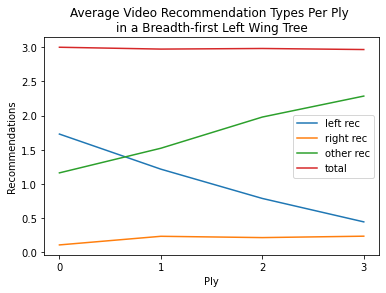

In [126]:
avg_per_position_left_breadth[['left rec', 'right rec', 'other rec', 'total']].plot(legend=True)

plt.ylabel('Recommendations')
plt.xlabel('Ply')
plt.locator_params('x', nbins = 4)
plt.title(label='Average Video Recommendation Types Per Ply \nin a Breadth-first Left Wing Tree')

Text(0.5, 1.0, 'Average Video Recommendation Types Per Ply \nin a Breadth-first Right Wing Tree')

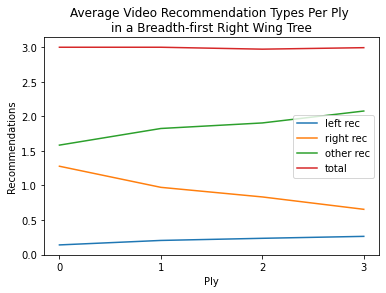

In [125]:
avg_per_position_right_breadth[['left rec', 'right rec', 'other rec', 'total']].plot(legend=True)

plt.ylabel('Recommendations')
plt.xlabel('Ply')
plt.locator_params('x', nbins = 4)
plt.title(label='Average Video Recommendation Types Per Ply \nin a Breadth-first Right Wing Tree')

### Correlation


In [85]:
for i in tags_left_bis:
    print(f'{i}: {avg_per_position_left_breadth["left rec"].corr(avg_per_position_left_breadth[i])}')

SocialJustice: 0.9990960557780523
Socialist: 0.9976407816148067
PartisanLeft: 0.9999735328131828
AntiWhiteness: nan
LGBT: 0.9904531763365858
Mainstream News: 0.6316533558033567
LateNightTalkShow: -0.545461434214655


In [64]:
for i in tags_right_bis:
    print(f'{i}: {avg_per_position_right_breadth["right rec"].corr(avg_per_position_right_breadth[i])}')

AntiSJW: 0.9131010783879718
Conspiracy: 0.9506755596953536
PartisanRight: 0.994515643310671
ReligiousConservative: 0.4845576617324215
WhiteIdentitarian: nan
Libertarian: 0.956096925296454
MRA: nan
Provocateur: 0.9894028146057591
Mainstream News: 0.722326478727166
LateNightTalkShow: 0.9125197601641973


### ii. Homepage

In [65]:
breadth_homepage_data = {
    'id': [],
    'ply': [],
    'tree bias': [],
    'left rec' : [],
    'right rec': [],
    'other rec': [],
    'total' : [],
    'AntiSJW': [],
    'Conspiracy': [],
    'PartisanRight': [],
    'ReligiousConservative': [],
    'WhiteIdentitarian': [],
    'Libertarian': [],
    'MRA': [],
    'Provocateur': [],
    'Mainstream News': [],
    'LateNightTalkShow': [],
    'SocialJustice' : [],
    'Socialist' : [],
    'PartisanLeft': [],
    'AntiWhiteness': [],
    'LGBT': [],
    'Mainstream News': []
}

homepage_number = 0
for homepage in breadth_homepages:
    homepage_number += 1
    #print(f'{homepage_number}/{len(survey_homepages)}')

    # check id
    id = (homepage.split('_')[4]).replace('.txt', '')

    # check ply
    ply = homepage.split('_')[1]
    tree_bias = None
    if id in breadth_right_ids:
        tree_bias = 'Right'
    elif id in breadth_left_ids:
        tree_bias = 'Left'

    with open(path_breadth_homepage + '\\' + homepage, 'r') as outfile:
        # array of urls
        lines = outfile.read().splitlines()
        lines = [i for i in lines if (not(i == None) and not(i == ''))]
        lines = lines[0 : min(10, len(lines))]

        if len(lines) > 0:
            count = {
                'left rec': 0,
                'right rec': 0,
                'other rec': 0,
                'total': 0,
                'AntiSJW': 0,
                'Conspiracy': 0,
                'PartisanRight': 0,
                'ReligiousConservative': 0,
                'WhiteIdentitarian': 0,
                'Libertarian': 0,
                'MRA': 0,
                'Provocateur': 0,
                'Mainstream News': 0,
                'LateNightTalkShow': 0,
                'SocialJustice' : 0,
                'Socialist' : 0,
                'PartisanLeft': 0,
                'AntiWhiteness': 0,
                'LGBT': 0,
                'Mainstream News': 0
            }
            none_count = 0
            for url in lines:
                content_creator = url_to_content_creator(url)
                if content_creator == None:
                    none_count += 1
                else:
                    bias, taggies = content_creator_to_bias(content_creator)
                    count[bias] += 1
                    count['total'] += 1
                    for i in taggies:
                        if i in count.keys():
                            count[i] += 1
            for k, v in count.items():
                breadth_homepage_data[k].append(v)
            breadth_homepage_data['tree bias'].append(tree_bias)
            breadth_homepage_data['ply'].append(ply)
            breadth_homepage_data['id'].append(id)
    homepage_number += 1

C:\Users\mikad\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [66]:
for k, v in breadth_homepage_data.items():
    print(k, len(v))

id 525
ply 525
tree bias 525
left rec 525
right rec 525
other rec 525
total 525
AntiSJW 525
Conspiracy 525
PartisanRight 525
ReligiousConservative 525
WhiteIdentitarian 525
Libertarian 525
MRA 525
Provocateur 525
Mainstream News 525
LateNightTalkShow 525
SocialJustice 525
Socialist 525
PartisanLeft 525
AntiWhiteness 525
LGBT 525


In [67]:
breadth_homepage_csv = pd.DataFrame.from_dict(breadth_homepage_data)
breadth_homepage_csv.head(10)

,id,ply,tree bias,left rec,right rec,other rec,total,AntiSJW,Conspiracy,PartisanRight,...,Libertarian,MRA,Provocateur,Mainstream News,LateNightTalkShow,SocialJustice,Socialist,PartisanLeft,AntiWhiteness,LGBT
0,039ba009-9367-4515-8516-47dd1be8bbdb,0,None,1,0,9,10,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,042d6afc-c005-42bc-ac93-8d8836f8e74e,0,Right,0,0,10,10,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,06259d16-6b15-4c27-9ac0-9c50398c88a2,0,Left,0,0,10,10,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0a406daa-ae8b-4ab6-9caa-8db9e73cebbe,0,Left,0,0,10,10,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0cbb70de-ac96-47fb-8e33-f805988dbf65,0,Right,2,1,7,10,0,1,0,...,0,0,1,2,0,0,1,2,0,0
5,10b5d6c7-4478-4d91-ad96-876af4877dd1,0,Right,2,0,8,10,0,0,0,...,0,0,0,2,0,1,0,2,0,0
6,182e6b0b-1665-4e65-a96b-b442e4464791,0,Left,0,0,10,10,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1f437457-e654-453e-a906-b74b2a66231c,0,Left,1,0,9,10,0,0,0,...,0,0,0,0,0,1,0,1,0,0
8,1fc4617a-ecaa-4f35-bdff-6eaeee54b36a,0,Left,0,1,9,10,0,0,1,...,0,0,0,1,0,0,0,0,0,0
9,25fd1aad-9402-481e-82ec-81b72fafad3c,0,Right,0,1,9,10,0,0,0,...,1,0,0,1,0,0,0,0,0,0


In [68]:
right_breadth_homepage = breadth_homepage_csv[breadth_csv['tree bias'] == 'Right'][['ply', 'left rec', 'right rec', 'other rec', 'total', 'AntiSJW', 'Conspiracy', 'PartisanRight', 'ReligiousConservative', 'WhiteIdentitarian', 'Libertarian', 'MRA', 'Provocateur', 'Mainstream News', 'LateNightTalkShow']]
left_breadth_homepage = breadth_homepage_csv[breadth_csv['tree bias'] == 'Left'][['ply', 'left rec', 'right rec', 'other rec', 'total', 'SocialJustice', 'Socialist', 'PartisanLeft', 'AntiWhiteness', 'LGBT', 'Mainstream News', 'LateNightTalkShow']]

avg_per_position_right_breadth_homepage = right_breadth_homepage.groupby('ply').mean()
avg_per_position_left_breadth_homepage = left_breadth_homepage.groupby('ply').mean()

<ipython-input-68-8217c1091ebc>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  right_breadth_homepage = breadth_homepage_csv[breadth_csv['tree bias'] == 'Right'][['ply', 'left rec', 'right rec', 'other rec', 'total', 'AntiSJW', 'Conspiracy', 'PartisanRight', 'ReligiousConservative', 'WhiteIdentitarian', 'Libertarian', 'MRA', 'Provocateur', 'Mainstream News', 'LateNightTalkShow']]
<ipython-input-68-8217c1091ebc>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  left_breadth_homepage = breadth_homepage_csv[breadth_csv['tree bias'] == 'Left'][['ply', 'left rec', 'right rec', 'other rec', 'total', 'SocialJustice', 'Socialist', 'PartisanLeft', 'AntiWhiteness', 'LGBT', 'Mainstream News', 'LateNightTalkShow']]


### Table organized by Ply

In [69]:
avg_per_position_left_breadth_homepage

,left rec,right rec,other rec,total,SocialJustice,Socialist,PartisanLeft,AntiWhiteness,LGBT,Mainstream News,LateNightTalkShow
ply,,,,,,,,,,,
1,0.827586,0.689655,8.482759,10.0,0.482759,0.310345,0.827586,0.0,0.068966,0.758621,0.068966
2,1.000000,1.373333,7.626667,10.0,0.680000,0.426667,1.186667,0.0,0.066667,0.920000,0.213333
3,1.253333,1.640000,7.106667,10.0,1.053333,0.706667,1.346667,0.0,0.106667,0.786667,0.253333
4,1.253968,1.698413,7.047619,10.0,1.126984,0.682540,1.444444,0.0,0.111111,0.714286,0.269841


In [70]:
avg_per_position_right_breadth_homepage

,left rec,right rec,other rec,total,AntiSJW,Conspiracy,PartisanRight,ReligiousConservative,WhiteIdentitarian,Libertarian,MRA,Provocateur,Mainstream News,LateNightTalkShow
ply,,,,,,,,,,,,,,
0,0.360000,0.586667,9.053333,10.0,0.186667,0.106667,0.360000,0.066667,0.0,0.253333,0.0,0.093333,0.626667,0.026667
1,0.717391,0.891304,8.391304,10.0,0.217391,0.130435,0.608696,0.086957,0.0,0.152174,0.0,0.260870,1.043478,0.108696
4,1.833333,0.750000,7.416667,10.0,0.583333,0.083333,0.416667,0.250000,0.0,0.333333,0.0,0.666667,0.250000,0.500000
5,1.200000,1.653333,7.146667,10.0,0.960000,0.373333,0.893333,0.400000,0.0,0.533333,0.0,0.200000,0.773333,0.226667
6,1.146667,1.613333,7.240000,10.0,1.000000,0.306667,0.946667,0.346667,0.0,0.506667,0.0,0.266667,0.760000,0.280000


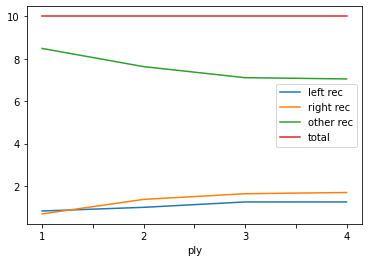

In [115]:
avg_per_position_left_breadth_homepage[['left rec', 'right rec', 'other rec', 'total']].plot(legend=True)

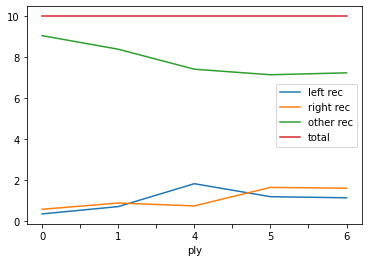

In [116]:
avg_per_position_right_breadth_homepage[['left rec', 'right rec', 'other rec', 'total']].plot(legend=True)

### Correlation Calculation

In [73]:
for i in tags_left_bis:
    print(f'{i}: {avg_per_position_left_breadth_homepage["left rec"].corr(avg_per_position_left_breadth_homepage[i])}')

SocialJustice: 0.9923452935257608
Socialist: 0.9939235969495138
PartisanLeft: 0.962186929759039
AntiWhiteness: nan
LGBT: 0.9245765235414464
Mainstream News: -0.2943204952479945
LateNightTalkShow: 0.9339047546701797


In [74]:
for i in tags_right_bis:
    print(f'{i}: {avg_per_position_right_breadth_homepage["right rec"].corr(avg_per_position_right_breadth_homepage[i])}')

AntiSJW: 0.9021371068408742
Conspiracy: 0.9699872142895796
PartisanRight: 0.9817304223824481
ReligiousConservative: 0.8689268662177301
WhiteIdentitarian: nan
Libertarian: 0.8531543578186821
MRA: nan
Provocateur: -0.1987236526808719
Mainstream News: 0.3369741915607202
LateNightTalkShow: 0.16280774709377077


# 3. Create CSV files

In [75]:
breadth_csv.to_csv('C:\\Users\\mikad\\PycharmProjects\\Comp_396_YouTube_Radicalization\\Analysis\\csvs\\' + 'breadth_experiment.csv')
depth_csv.to_csv('C:\\Users\\mikad\\PycharmProjects\\Comp_396_YouTube_Radicalization\\Analysis\\csvs\\' + 'depth_experiment.csv')
survey_csv.to_csv('C:\\Users\\mikad\\PycharmProjects\\Comp_396_YouTube_Radicalization\\Analysis\\csvs\\' + 'survey_experiment.csv')
